In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\USER\Documents\Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
#check if data has any duplicated values
df.duplicated().sum()

0

Distribution of Target Variable - Diagnosis

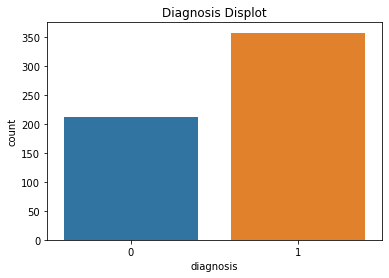

1    357
0    212
Name: diagnosis, dtype: int64

In [5]:
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Displot')
plt.show()
df['diagnosis'].value_counts()

In [6]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


<AxesSubplot:>

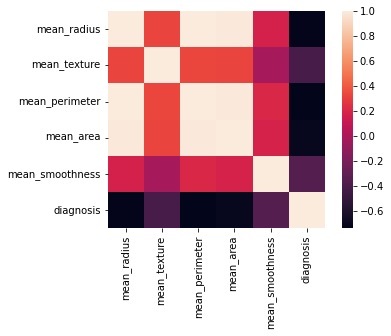

In [12]:
sns.heatmap(df.corr(), square = True)

It is noticed that mean_perimeter, mean_radius, mean_area have more negative correlation with the diagnosis than mean_texture and mean_smoothness.
It is also noticed that there is high corelation between the top 3 features mentioned i.e. mean_perimeter, mean_radius, mean_area

## Feature Selection

In [15]:
from scipy.stats import pearsonr
for feature in df.drop('diagnosis',axis=1).columns:
    print(feature)
    corr, p_value = pearsonr(df[feature], df.diagnosis)
    print(p_value<0.05)

mean_radius
True
mean_texture
True
mean_perimeter
True
mean_area
True
mean_smoothness
True


## Outliers Detection

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_radius'>

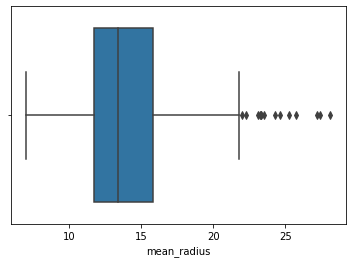

In [17]:
sns.boxplot(df['mean_radius'])

Upper outliers detected

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_perimeter'>

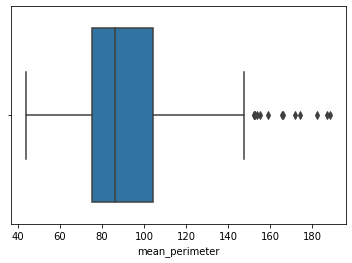

In [18]:
sns.boxplot(df['mean_perimeter'])

upper outliers detected

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_area'>

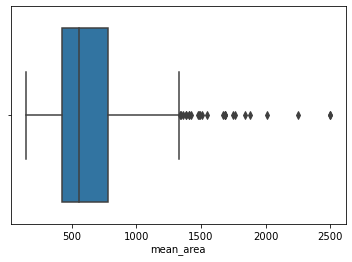

In [19]:
sns.boxplot(df['mean_area'])

upper outliers detected

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_area'>

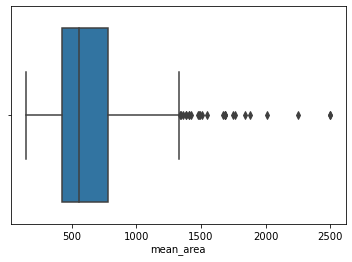

In [20]:
sns.boxplot(df['mean_area'])

upper outliers detected

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_smoothness'>

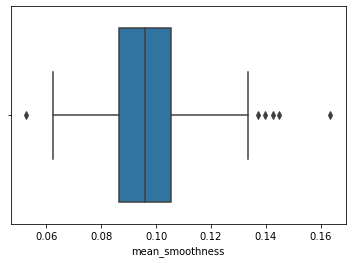

In [21]:
sns.boxplot(df['mean_smoothness'])

upper outliers detected

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis'>

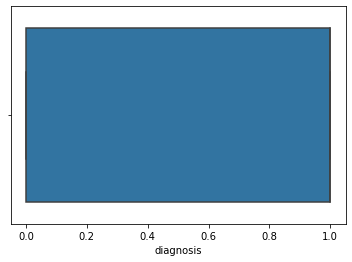

In [22]:
sns.boxplot(df['diagnosis'])

no outliers detected

## Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']
sc= StandardScaler().fit(X)
X_scaled=pd.DataFrame(sc.transform(X),columns=X.columns)

## Handling outliers

In [25]:
X_scaled = np.clip(X_scaled,-4,5)